# Loading...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv('Trimmed.csv')
data

,Date,Sales
0,01-06-2020,34857.12
1,02-06-2020,34857.12
2,03-06-2020,34857.12
3,04-06-2020,25710.99
4,05-06-2020,25710.99
...,...,...
838,17-09-2022,32919.11
839,18-09-2022,89994.40
840,19-09-2022,89994.40
841,20-09-2022,88210.02


In [3]:
#data.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
#data.head()

,Date,Sales
0,2020-06-01,34857.12
1,2020-06-02,34857.12
2,2020-06-03,34857.12
3,2020-06-04,25710.99
4,2020-06-05,25710.99


In [34]:
data.set_index('Date', inplace=True)
data.head()

,Sales
Date,
01-06-2020,34857.12
02-06-2020,34857.12
03-06-2020,34857.12
04-06-2020,25710.99
05-06-2020,25710.99


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 843 entries, 01-06-2020 to 21-09-2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   843 non-null    float64
dtypes: float64(1)
memory usage: 13.2+ KB


# Visualisation

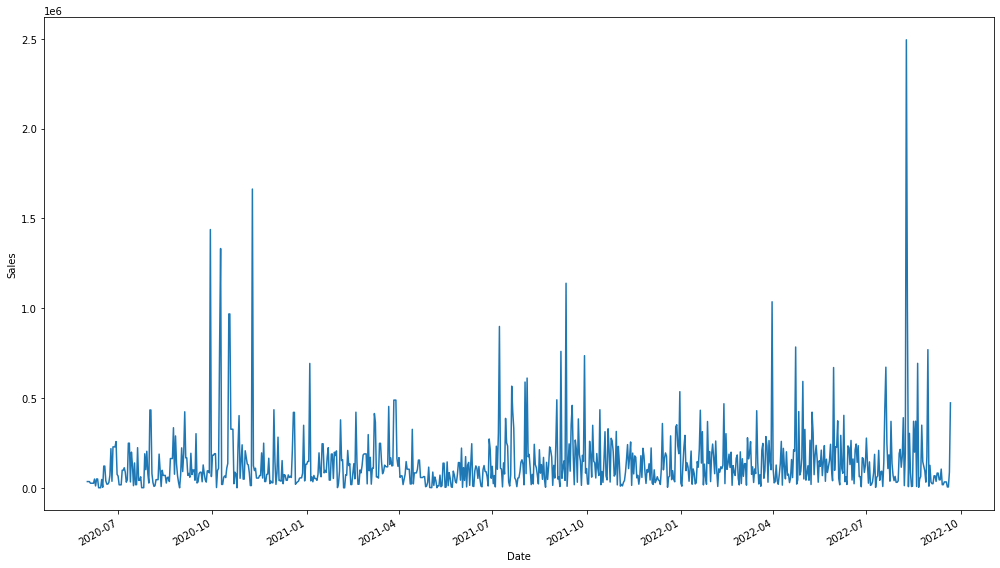

In [6]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(data['Sales'])
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


#fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(data['Sales'])
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(data, test_size= 0.15, train_size=0.85, shuffle= False)

In [8]:
train.count()

Sales    716
dtype: int64

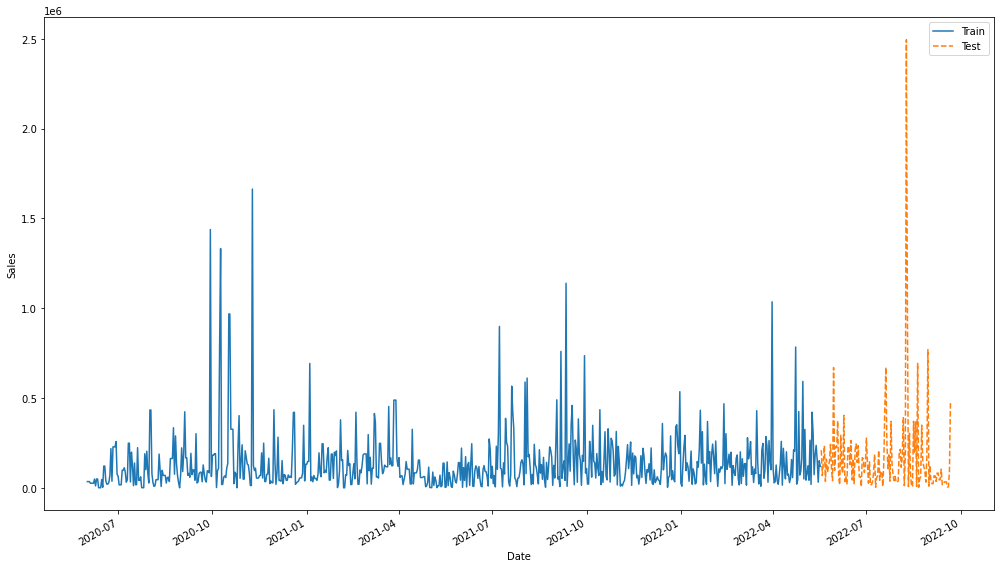

In [9]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(train, ls='-', label='Train')
ax.plot(test, ls='--', label='Test')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.legend(loc='best')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [10]:
data_pred_baseline = train[-632:].values

* repeating the last week of data from the training set into the future

In [11]:
#decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
r=seasonal_decompose(data['Sales'])

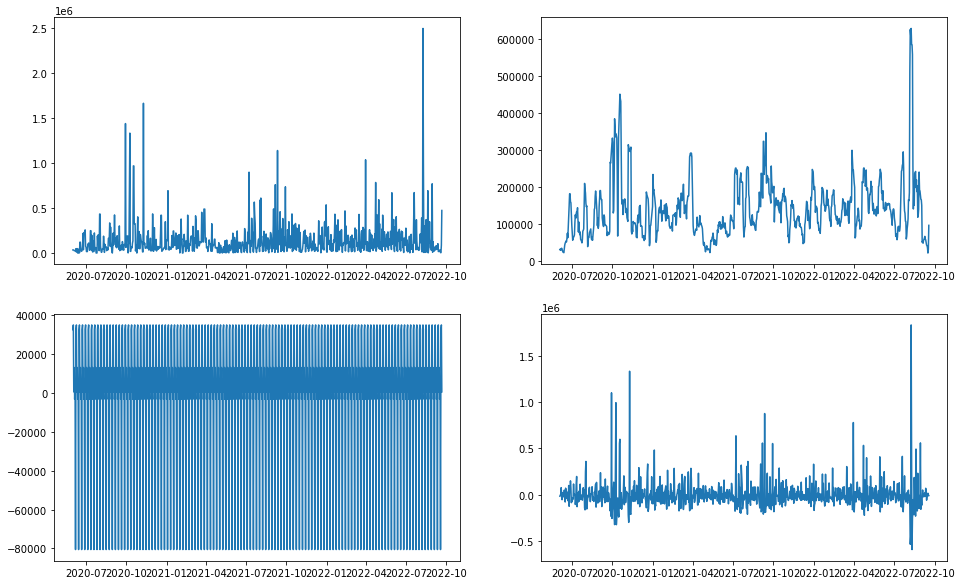

In [12]:
# Plotting all Components at once
figure, axis = plt.subplots(2, 2, figsize=(16,10))

axis[0,0].plot(r.observed) # original data
axis[0,1].plot(r.trend)    # trend component
axis[1,0].plot(r.seasonal) # seasonal component
axis[1,1].plot(r.resid)    # residuals 

plt.show()

# Applying BATS

In [23]:
from tbats import BATS, TBATS

In [31]:
forecaster_1 = BATS(use_box_cox=True,
                  use_trend=None,
                  use_damped_trend=False,
                  seasonal_periods = [90],
                  multiprocessing_start_method = "forkserver"
                  )
forecaster_1.fit(train)

ValueError: cannot find context for 'forkserver'

In [29]:
forecaster_1

AttributeError: 'BATS' object has no attribute 'multiprocessing_start_method'

AttributeError: 'BATS' object has no attribute 'multiprocessing_start_method'

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction

In [16]:
# declarative forecaster specification - just two lines!
regressor = KNeighborsRegressor(n_neighbors=1)

In [18]:
forecaster = make_reduction(data['Sales'], window_length=3, scitype = "time-series-regressor",strategy="recursive")

In [19]:
a = forecaster.forecast(forecaster, h = 2, level = c(80, 95), fan = FALSE, biasadj = NULL, )

AttributeError: 'RecursiveTimeSeriesRegressionForecaster' object has no attribute 'forecast'

In [20]:
y_pred_BATS = forecaster.predict()

NotFittedError: This instance of RecursiveTimeSeriesRegressionForecaster has not been fitted yet; please call `fit` first.

In [ ]:
tbats
#forecast(object, h, level = c(80, 95), fan = FALSE, biasadj = NULL, ...)

In [ ]:
#data_pred_BATS = forecaster.forecast(fh)

In [37]:
from sktime.forecasting.tbats import TBATS
forecaster1 = TBATS(use_box_cox=True,
                   use_trend=False,
                   use_damped_trend=False,
                   )

In [39]:
forecaster1.fit(train)

TBATS(use_box_cox=True, use_damped_trend=False, use_trend=False)

In [32]:
y_pred_BATS = forecaster.fit_predict(test)

TypeError: Cannot clone object 'Date
2020-06-01     34857.12
2020-06-02     34857.12
2020-06-03     34857.12
2020-06-04     25710.99
2020-06-05     25710.99
                ...    
2022-09-17     32919.11
2022-09-18      4877.26
2022-09-19      4877.26
2022-09-20     88210.02
2022-09-21    473189.56
Name: Sales, Length: 843, dtype: float64' (type <class 'pandas.core.series.Series'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.